In [117]:
import keras
import tensorflow 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import RandomTranslation, RandomZoom, RandomRotation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [93]:
from tensorflow.keras.datasets import mnist

In [94]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_full = np.concatenate((X_train, X_test))
y_train_full = np.concatenate((y_train, y_test))
valid = pd.read_csv('train.csv').to_numpy()
test = pd.read_csv('test.csv').to_numpy()
sample_submission = pd.read_csv('sample_submission (1).csv').to_numpy()
train_Y = tensorflow.keras.utils.to_categorical(y_train_full)
valid_Y = tensorflow.keras.utils.to_categorical(valid[:,0])

train_X = X_train_full / 255.0
valid_X = valid[:,1:] / 255.0
test_X = test / 255.0

train_X = train_X.reshape(-1, 28, 28, 1)
valid_X = valid_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

print(train_X.shape,valid_X.shape,test_X.shape)

(70000, 28, 28, 1) (42000, 28, 28, 1) (28000, 28, 28, 1)


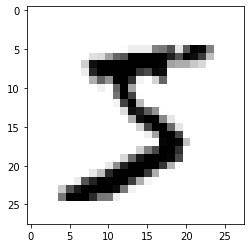

In [95]:
plt.imshow(X_train[0], cmap='binary')

In [96]:
train_X[0].shape

(28, 28, 1)

In [122]:
class Model:
  def build(height, width, depth):
    model = Sequential()

    model.add(Conv2D(32, 3, padding = 'same', kernel_initializer = 'glorot_normal', activation = 'relu', input_shape = (28,28,1)))
    model.add(Conv2D(32, 3, padding = 'same', kernel_initializer = 'glorot_normal', activation = 'relu'))
    model.add(Conv2D(32, 3, padding = 'same', kernel_initializer = 'glorot_normal', activation = 'relu'))
    model.add(MaxPool2D(2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'glorot_normal', activation = 'relu'))
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'glorot_normal', activation = 'relu'))
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'glorot_normal', activation = 'relu'))
    model.add(MaxPool2D(2))
    model.add(BatchNormalization())

    model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'glorot_normal', activation = 'relu'))
    model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'glorot_normal', activation = 'relu'))
    model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'glorot_normal', activation = 'relu'))
    model.add(MaxPool2D(2))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(0.3))

    model.add(Dense(512, kernel_initializer = 'glorot_normal', activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation = 'softmax'))

    model.summary()
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
    return model

In [123]:
model = Model.build(28,28,1)
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_42 (Conv2D)          (None, 14, 14, 64)      

In [125]:
stop = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=6)
model_fit = model.fit(train_X,
                      train_Y,
                      batch_size=500,
                      verbose=1,
                      epochs=50,
                      validation_split=0.25,
                      callbacks=[stop])

Epoch 1/50
105/105 [==============================] - 674s 6s/step - loss: 0.0512 - binary_accuracy: 0.9864 - val_loss: 0.3868 - val_binary_accuracy: 0.9000
Epoch 2/50
105/105 [==============================] - 534s 5s/step - loss: 0.0094 - binary_accuracy: 0.9976 - val_loss: 0.3545 - val_binary_accuracy: 0.8277
Epoch 3/50
105/105 [==============================] - 542s 5s/step - loss: 0.0063 - binary_accuracy: 0.9983 - val_loss: 0.2971 - val_binary_accuracy: 0.8372
Epoch 4/50
105/105 [==============================] - 547s 5s/step - loss: 0.0046 - binary_accuracy: 0.9988 - val_loss: 0.0977 - val_binary_accuracy: 0.9599
Epoch 5/50
105/105 [==============================] - 537s 5s/step - loss: 0.0033 - binary_accuracy: 0.9991 - val_loss: 0.0092 - val_binary_accuracy: 0.9976
Epoch 6/50
105/105 [==============================] - 537s 5s/step - loss: 0.0030 - binary_accuracy: 0.9992 - val_loss: 0.0126 - val_binary_accuracy: 0.9965
Epoch 7/50
105/105 [==============================] - 533s

In [126]:
pred = model.predict(test_X)
classes = pred.argmax(axis=-1)
sub = pd.read_csv('sample_submission (1).csv')
sub.Label = classes
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [129]:
sub.to_csv('sample_submission (1).csv', index = False)